In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from IPython.display import Image

%matplotlib inline

In [86]:
#subway entrance each 15 minutes for station during 2014 original download
#data is almost 1Gb, in the folder there are some files produced out of this scrip
#'morningRushStations.csv'
#'eveningRushStations.csv'
#'gTimeLine.csv',index_col='time'
'''
url = 'https://recursos-data.buenosaires.gob.ar/ckan2/subte-molinetes/molinetes_2014.csv'
rawData = pd.read_csv(url,
                      sep = ';',
                      usecols = [0,1,3,5,9],
                      parse_dates = [0]
                     )
rawData.columns = ['date','time','line','station','trips']

#change wrong labels in stations
rawData.station.replace(to_replace='Saenz Peña', value='Saenz Pena', inplace=True)
rawData.station.replace(to_replace='Independencia.', value='Independencia', inplace=True)

#get days and remove sunday and saturday
#Monday=0, Sunday=6
rawData['day'] = rawData.date.map(lambda x: x.weekday())
rawData.query('day < 5', inplace=True)
rawData.drop('day', inplace = True, axis = 1)

#group by time - roush hour general
#gTime = rawData.groupby(['time']).trips.mean()

lines = rawData.line.unique()
#group by time and line - roush hour por linea
gTimeLine = rawData.groupby(['line','time']).mean()

#data set for morning and evening rush trips
morningRush = ['08:00','08:15','08:30','08:45','09:00','09:15','09:30']
eveningRush = ['17:00','17:15','17:30','17:45','18:00','18:15','18:30']

morningRushData = rawData.copy()[rawData.time.isin(morningRush)]
eveningRushData = rawData.copy()[rawData.time.isin(eveningRush)]

morningRushStations = morningRushData.groupby(['line','station']).mean()
eveningRushStations = eveningRushData.groupby(['line','station']).mean()
'''

In [87]:
#load saved data
morningRushStations.to_csv('morningRushStations.csv')
eveningRushStations.to_csv('eveningRushStations.csv')
gTimeLine.to_csv('gTimeLine.csv')

In [88]:
lineColors = {'A':'dodgerblue','B':'red','C':'blue','D':'limegreen','E':'blueviolet','H':'yellow','P':'orange'}
#subway station order
stationOrder ={'A':
               ['San Pedrito','Flores', 'Carabobo',  'Puan','Primera Junta', 'Acoyte','Rio de Janeiro', 
                'Castro Barros','Loria',  'Plaza Miserere', 'Alberti','Pasco','Congreso', 'Saenz Pena',
                'Lima', 'Piedras', 'Peru','Plaza de Mayo'],
               'B':[ 'Rosas', 'Echeverria', 'Los Incas', 'Tronador','Federico Lacroze', 'Dorrego', 'Malabia',
                    'Angel Gallardo','Medrano', 'Carlos Gardel', 'Pueyrredon', 'Pasteur','Callao','Uruguay',
                    'Carlos Pellegrini', 'Florida','Leandro N. Alem'],
               'C': [ 'Retiro','General San Martin','Lavalle','Diagonal Norte','Avenida de Mayo',
                     'Mariano Moreno','Independencia','San Juan','Constitucion'],
               'D':['Congreso de Tucuman','Juramento','Jose Hernandez','Olleros','Ministro Carranza',
                    'Palermo','Plaza Italia','Scalabrini Ortiz','Bulnes','Aguero','Pueyrredon.',
                    'Facultad de Medicina','Callao.','Tribunales','9 de julio','Catedral'],
               'E':['Pza. de los Virreyes','Varela', 'Medalla Milagrosa','Emilio Mitre', 'Jose Maria Moreno',
                    'Avenida La Plata','Boedo','Urquiza','Jujuy','Pichincha','Entre Rios','San Jose',
                    'Independencia','General Belgrano','Bolivar'],
               'H':['Corrientes','Once', 'Venezuela','Humberto I','Inclan','Caseros','Patricios','Hospitales']
              }

In [106]:
#load data
morningRushStations = pd.read_csv('morningRushStations.csv')
eveningRushStations = pd.read_csv('eveningRushStations.csv')
gTimeLine = pd.read_csv('gTimeLine.csv',index_col='time')

In [105]:
morningData = morningRushStations.copy().loc[morningRushStations.line=='C',:]
eveningData = eveningRushStations.copy().loc[eveningRushStations.line=='C',:]

morningData['stationCat'] = morningData.station.astype('category')
eveningData['stationCat'] = eveningData.station.astype('category')
morningData

,line,station,trips,stationCat
35,C,Avenida de Mayo,9.526642,Avenida de Mayo
36,C,Constitucion,92.892734,Constitucion
37,C,Diagonal Norte,7.559811,Diagonal Norte
38,C,General San Martin,11.452410,General San Martin
39,C,Independencia,21.753814,Independencia
40,C,Lavalle,4.995314,Lavalle
41,C,Mariano Moreno,8.425896,Mariano Moreno
42,C,Retiro,68.851953,Retiro
43,C,San Juan,35.392013,San Juan


In [107]:
#data stations frips
morningData = morningRushStations.copy().loc[morningRushStations.line=='C',:]
eveningData = eveningRushStations.copy().loc[eveningRushStations.line=='C',:]

morningData['stationCat'] = morningData.station.astype('category')
eveningData['stationCat'] = eveningData.station.astype('category')

#data rush hours
data = gTimeLine.loc[gTimeLine.line == 'C',:]
morningIndex = list(data.index)[:len(data.index)/2]
eveningIndex = list(data.index)[len(data.index)/2:]

morningDataRush = data.copy()[data.index.isin(morningIndex)]
eveningDataRush = data.copy()[data.index.isin(eveningIndex)]


#ticks
x = np.linspace(0,2*np.pi,48)
ticks1 = x[12:]
ticks2 = x[:12] 
ticks = np.concatenate((ticks1, ticks2))
reverseTicks = ticks[::-1]
morningDataRush['ticks'] = reverseTicks
eveningDataRush['ticks'] = reverseTicks


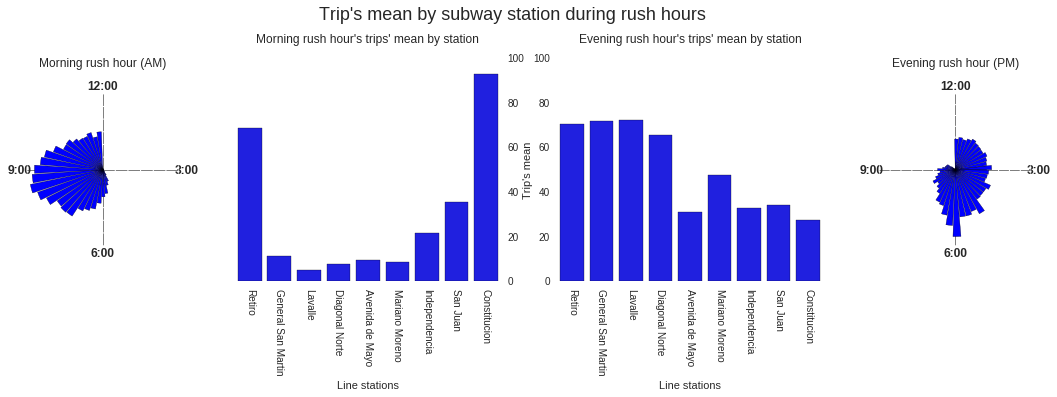

In [113]:
width = .12
ticksLabels = [np.pi/2,2*np.pi,np.pi*3/2,np.pi]
ticksLabelsText = ['12:00','3:00','6:00','9:00',]


fig = plt.figure(figsize=(18,4))
fig.suptitle("Trip's mean by subway station during rush hours", fontsize=18, y=1.08)
#Plot morning rush hour


gs = gridspec.GridSpec(1, 4,
                       width_ratios=[4,7,7,4],
                       height_ratios=[1]
                       )
gs.update(wspace=0.27)

ax1 = fig.add_subplot(gs[0], polar=True, axisbg='white')
theta = morningDataRush.ticks
radii = morningDataRush.trips

ax1.bar(left = theta, height = radii, width = width, color = lineColors['C'])
ax1.set_xticks(ticksLabels)
ax1.set_xticklabels(ticksLabelsText, fontsize=12, fontweight='bold')
ax1.set_yticklabels('')
ax1.set_title('Morning rush hour (AM)', y=1.15)
ax1.grid(linewidth = 1 ,color = 'grey',axis = 'x',linestyle='-')

#Plot morning stations trips
#ax2 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(gs[1], axisbg='white')
ax2 = sns.barplot(morningData.station,morningData.trips, color = lineColors['C'], order=stationOrder['C'])
ax2.set_xticks(range(len(morningData.station)))
ax2.set_xticklabels(stationOrder['C'], rotation = 270)
ax2.set_xlabel('Line stations')
ax2.yaxis.tick_right()
ax2.set_ylabel("")
ax2.set_ylim(0,100)
ax2.set_title("Morning rush hour's trips' mean by station", y=1.05)

#Plot evening stations trips
#ax3 = fig.add_subplot(1,4,3,gs[2])
ax3 = fig.add_subplot(gs[2], axisbg='white')
ax3 = sns.barplot(eveningData.station,eveningData.trips, color =  lineColors['C'],order=stationOrder['C'])
ax3.set_xticks(range(len(eveningData.station)))
ax3.set_xticklabels(stationOrder['C'], rotation = 270)
ax3.set_xlabel('Line stations')
ax3.set_ylim(0,100)
ax3.set_ylabel("Trip's mean", labelpad=.02 )
ax3.set_title("Evening rush hour's trips' mean by station", y=1.05)


#Plot evening rush hour
ax4 = fig.add_subplot(gs[3], polar=True, axisbg='white') 
theta = eveningDataRush.ticks
radii = eveningDataRush.trips

ax4.bar(left = theta, height = radii, width = width, color = lineColors['C'])
ax4.set_xticks(ticksLabels)
ax4.set_xticklabels(ticksLabelsText, fontsize=12, fontweight='bold')
ax4.set_yticklabels('')
ax4.set_title('Evening rush hour (PM)', y=1.15)
ax4.grid(linewidth = 1 ,color = 'grey',axis = 'x',linestyle='-')

# Figure 1
The plot shows, for the *C line*, the rush hour period, every 15 minutes (morning has peek around 9 am and evening around 6 pm) and the mean's trip for every station during the morning and evening rush hours (from 8 to 9:30 am and from 5 to 6:30 pm). While during the morning the terminal stations have more activity (**Retiro** and **Constitución**), the evening period shows more activity in the 4 stations closest to **Retiro**. The *C line* doesn't have a radial design, which connect city center with the most peripheral neighborhoods, but rather a circumferential one, crosing the other subway lines.**Retiro** and **Constitución** are also the interurban train stations, connecting with the North and the South, respectively, of the Greater Buenos Aires (the first is has overall better socioeconomic indicators).

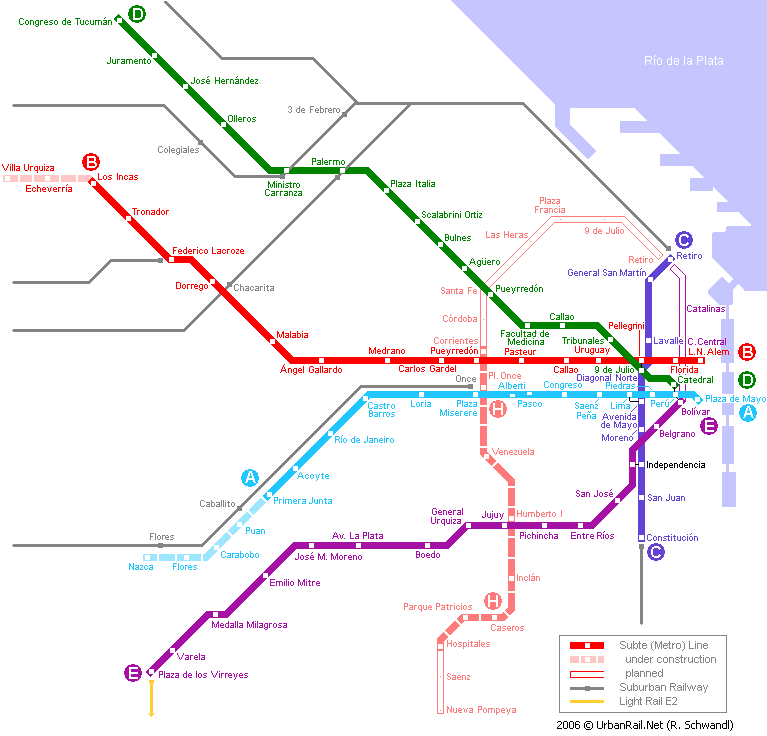

In [116]:
Image("img/baSubwayMap.png")
